In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm 
from astropy.io import fits 
from matplotlib import colors 
from astropy.wcs import WCS

In [22]:
fig = plt.figure(figsize=(10,10))
hdu_list = fits.open('/users/ava/downloads/mag20210815nirc2_lp_PyFWS.fits')

<Figure size 1000x1000 with 0 Axes>

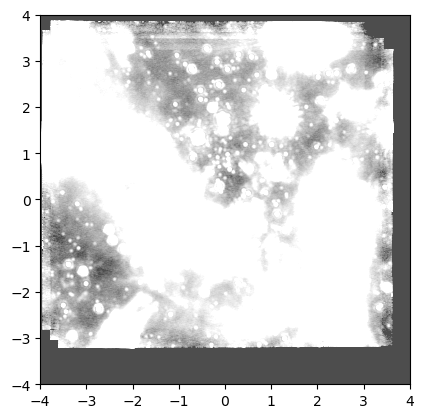

In [38]:
#Plotting fits file in arcseconds

imgL = hdu_list[0].data
plt.imshow(imgL, cmap='gray', origin='lower', extent=[-4,4, -4,4], norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e3), zorder=-10, alpha=.7)#, clim(0, 2e3))

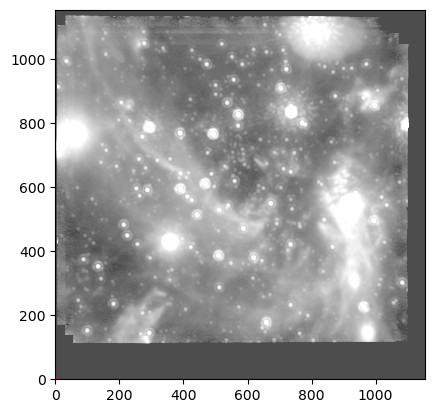

In [47]:
#Adjusted exposure

plt.imshow(imgL, cmap='gray', origin='lower', norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=.7)#, clim(0, 2e3))
pts = np.array([[.492326, .76434], [.570969, .824112], [.60497, .769043]])
plt.scatter(pts[:, 0], pts[:, 1], marker="o", color="red", s=2)
plt.show()

In [61]:
#Opening .lis file

filename = '/users/ava/downloads/mag20210815nirc2_lp_rms_named_PyFWS.lis'
with open(filename) as f:
    for line in f:
        print(line)

# name              m         t          x          y         xe         ye                   snr    corr  N_frames                  flux

irs16C          8.076  2021.621    492.326    764.334      0.005      0.005               17.5293    1.00        42              50568300

irs16NW         8.490  2021.621    570.969    824.112      0.008      0.005               17.5295    1.00        42              34535000

star_1          5.155  2021.621     60.497    769.043      0.341      0.044               11.5489    1.00        29             745164992

star_2          5.557  2021.621    356.473    429.521      0.005      0.036               17.4520    1.00        42             514711008

irs29N          6.358  2021.621    736.054    832.968      0.005      0.023               17.5003    1.00        42             246191008

irs16NE         7.489  2021.621    292.688    784.439      0.006      0.007               17.5232    1.00        43              86831504

star_6          8.071  2021

/var/folders/4z/0ns4k1dj5gg4fj96r9b0x39m0000gn/T/ipykernel_21029/681595909.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  starname = np.loadtxt('/users/ava/downloads/mag20210815nirc2_lp_rms_named_PyFWS.lis', skiprows=1, dtype=np.str, usecols=[0])


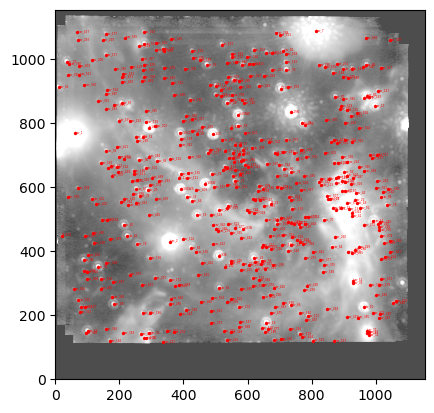

In [132]:
#Plotting all the stars from the .lis file 

starpos = np.loadtxt('/users/ava/downloads/mag20210815nirc2_lp_rms_named_PyFWS.lis', skiprows=1, usecols=[3,4])
plt.imshow(imgL, cmap='gray', origin='lower', norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=.7)#, clim(0, 2e3))
plt.scatter(starpos[:,0], starpos[:,1], color='red', s=2)
starname = np.loadtxt('/users/ava/downloads/mag20210815nirc2_lp_rms_named_PyFWS.lis', skiprows=1, dtype=np.str, usecols=[0])
for i in range(0, len(starname)): plt.annotate(starname[i], [starpos[i,0], starpos[i,1]], color='red', size=2)

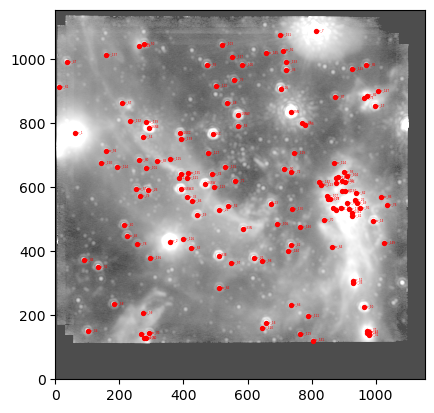

In [179]:
#Plotting stars of only a certain magnitude 
#Greater Magnitude = smaller number

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

starpos = np.loadtxt('/users/ava/downloads/mag20210815nirc2_lp_rms_named_PyFWS.lis', skiprows=1, usecols=[3, 4])

plt.imshow(imgL, cmap='gray', origin='lower', norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=0.7)

starname = np.loadtxt('/users/ava/downloads/mag20210815nirc2_lp_rms_named_PyFWS.lis', skiprows=1, dtype=str, usecols=[0])

magnitudes = np.loadtxt('/users/ava/downloads/mag20210815nirc2_lp_rms_named_PyFWS.lis', skiprows=1, usecols=[1])

for i in range(len(starname)):
    if magnitudes[i] <= 12: #change magnitude threshold here 
        plt.scatter(starpos[i, 0], starpos[i, 1], color='red', s=8)
        plt.annotate(starname[i], [starpos[i, 0], starpos[i, 1]], color='red', size=2)

plt.show()

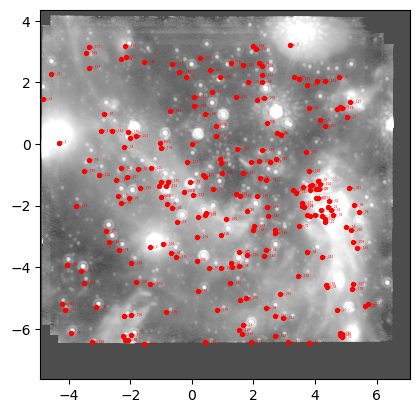

In [178]:
#Plotting stars in arcsecond relative to IRS16C

pixels_to_arcsec = 0.01 #I have found multiple numbers for this and not sure which is correct

x_factor = 492.326 * pixels_to_arcsec # factors are relative to IRS16C
y_factor = 764.334 * pixels_to_arcsec


starpos = np.loadtxt('/users/ava/downloads/mag20210815nirc2_lp_rms_named_PyFWS.lis', skiprows=1, usecols=[3, 4])
starpos_arcsec = starpos * pixels_to_arcsec

plt.imshow(imgL, cmap='gray', origin='lower', extent=[-4.923,7.076, -7.64,4.36], norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=0.7)

starname = np.loadtxt('/users/ava/downloads/mag20210815nirc2_lp_rms_named_PyFWS.lis', skiprows=1, dtype=str, usecols=[0])
magnitudes = np.loadtxt('/users/ava/downloads/mag20210815nirc2_lp_rms_named_PyFWS.lis', skiprows=1, usecols=[1])

for i in range(len(starname)):
    if magnitudes[i] <= 13:  # change magnitude threshold here 
        plt.scatter((starpos_arcsec[i, 0] - x_factor) , (starpos_arcsec[i, 1] - y_factor), color='red', s=8)
        plt.annotate(starname[i], [starpos_arcsec[i, 0]- x_factor, starpos_arcsec[i, 1] - y_factor], color='red', size=2)

plt.show()